/Users/bill/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,770 (295.98 KB)

 Trainable params: 75,770 (295.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0021 - val_loss: 0.0295
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3768e-04 - val_loss: 0.0202
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1792e-04 - val_loss: 0.0205
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.8841e-05 - val_loss: 0.0176
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.1336e-05 - val_loss: 0.0218
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.4476e-05 - val_loss: 0.0185
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.3653e-05 - val_loss: 0.0196
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2372e-05 - val_loss: 0.0171
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6847e-05 - val_loss: 0.0137
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.4736e-05 - val_loss: 0.0147
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.3900e-05 - val_loss: 0.0123
Epoch 12/20
56/56 ━━━━━

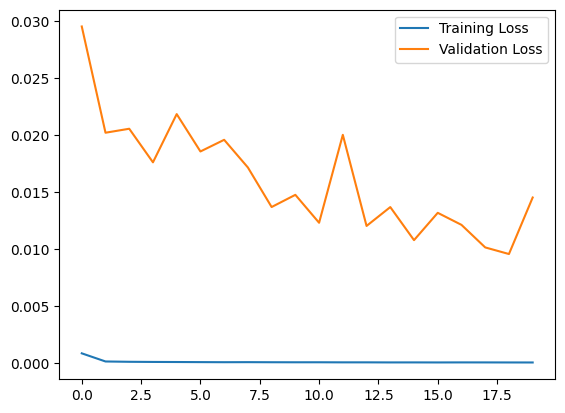

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
                  Open        High         Low       Close
2024-12-13  106.098862  105.212257  106.802818  108.126389
2024-12-14  106.834549  105.675453  106.418175  104.045120
2024-12-15  103.456985  106.443306  105.072418  105.825317
2024-12-16  107.380913  109.966148   99.832550  102.157074
2024-12-17  104.725838  107.502045   98.437454  102.013199


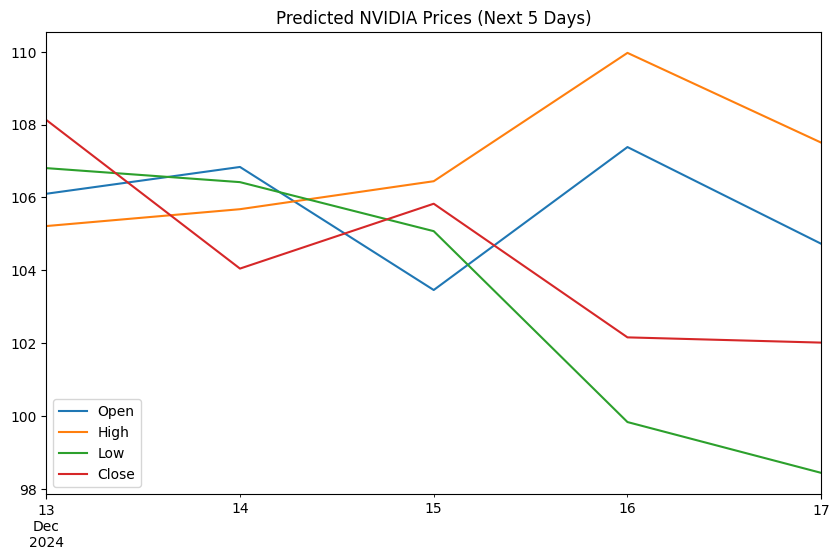

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data[['Open', 'High', 'Low', 'Close']]

# Fetch data
start_date = "2016-01-01"
end_date = "2024-12-13"
data = fetch_stock_data("NVDA", start_date, end_date)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training and target sets for LSTM
def prepare_data(data, n_past, n_future):
    X, y = [], []
    for i in range(n_past, len(data) - n_future + 1):
        X.append(data[i - n_past:i, :])  
        y.append(data[i:i + n_future, :]) 
    return np.array(X), np.array(y)

n_past = 30  # Use the past 30 days
n_future = 5  # Predict the next 5 days
X, y = prepare_data(scaled_data, n_past, n_future)

# Split into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(n_past, X.shape[2])),
    Dropout(0.1),
    LSTM(50, return_sequences=False),
    Dropout(0.1),
    Dense(50, activation='tanh'),
    Dense(n_future * 4) 
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), epochs=20, batch_size=32, validation_data=(X_test, y_test.reshape(y_test.shape[0], -1)))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
def predict_future(data, model, n_past, n_future, scaler):
    last_n_days = data[-n_past:]
    input_data = np.expand_dims(last_n_days, axis=0)
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)  # Reshape to 5x4
    return scaler.inverse_transform(prediction)

# Predict the next 5 days
scaled_data_for_prediction = scaled_data[-n_past:]
predicted_prices = predict_future(scaled_data_for_prediction, model, n_past, n_future, scaler)

# Create a DataFrame for predicted prices
predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'])
predicted_df.index = pd.date_range(start=end_date, periods=n_future)
print(predicted_df)

# Save the model and predictions
model.save("nvda_lstm_model.keras")
predicted_df.to_csv("predicted_nvda_prices.csv")

# Plot predictions
predicted_df.plot(title="Predicted NVIDIA Prices (Next 5 Days)", figsize=(10, 6))
plt.show()


Validation 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Processed 2024-01-01: Overall MSE = 1.88
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Processed 2024-01-02: Overall MSE = 6.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Processed 2024-01-03: Overall MSE = 13.09
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processed 2024-01-04: Overall MSE = 23.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Processed 2024-01-05: Overall MSE = 36.28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Processed 2024-01-08: Overall MSE = 43.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processed 2024-01-09: Overall MSE = 44.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Processed 2024-01-10: Overall MSE = 34.82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Processed 2024-01-11: Overall MSE = 25.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Processed 2024-01-12: Overall MSE = 21.20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Processed 2024-01-15: Overall MSE = 19.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processed 2024-01-16: Overall MSE = 25.85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

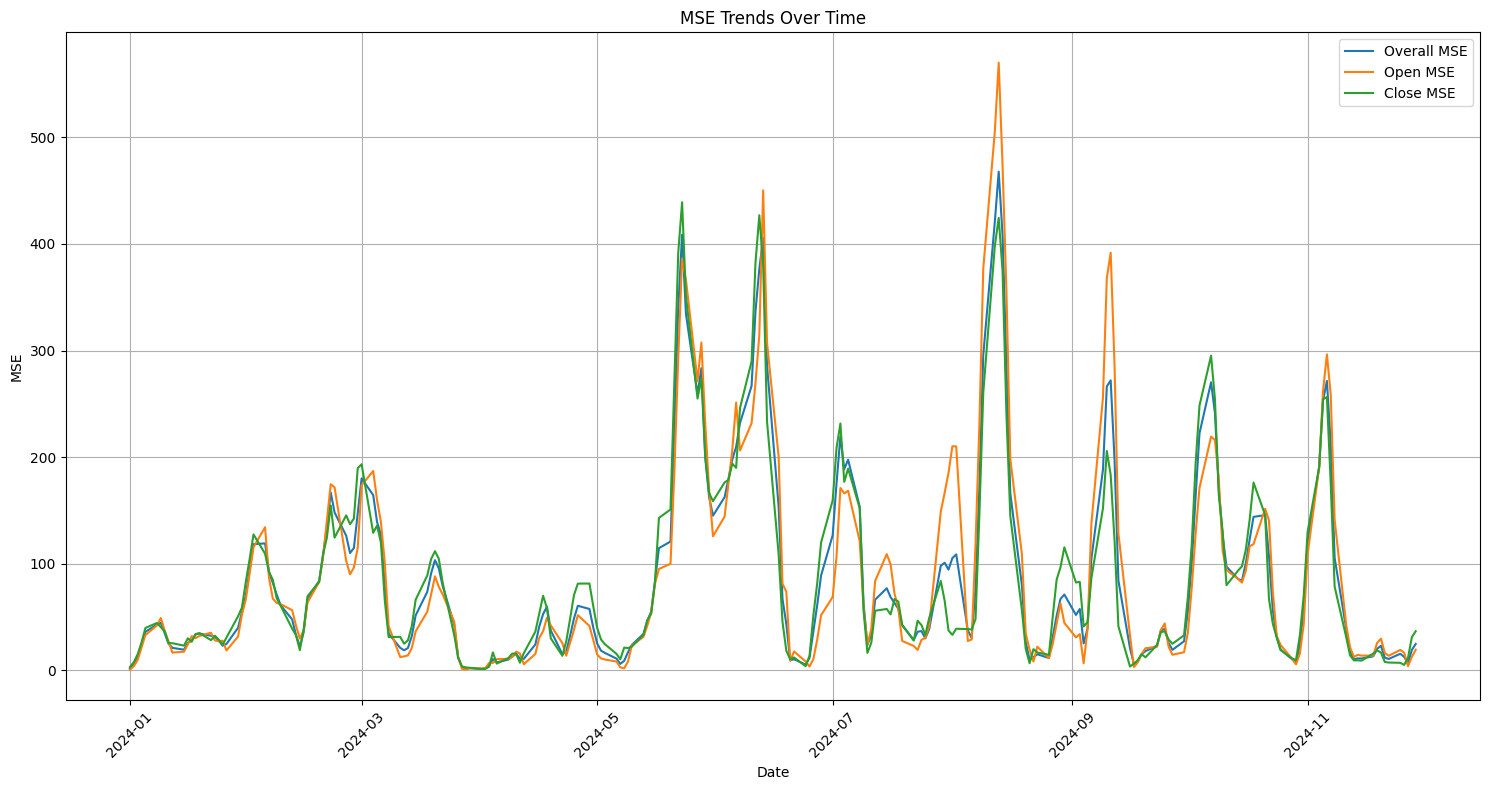


Best Prediction Date:
Date: 2024-04-01
Overall MSE: 1.45

Worst Prediction Date:
Date: 2024-08-13
Overall MSE: 467.88
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Mean Squared Error for 2024-09-22
Open: 23.34
High: 21.99
Low: 23.00
Close: 21.27
Overall: 22.40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Mean Squared Error for 2024-10-20
Open: 129.41
High: 146.49
Low: 132.79
Close: 162.28
Overall: 142.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Mean Squared Error for 2024-11-18
Open: 13.91
High: 18.12
Low: 5.14
Close: 15.87
Overall: 13.26
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Prices:
                  Open        High         Low       Close
2024-09-23  117.899544  119.892639  115.096367  117.810852
2024-09-24  118.891640  119.686325  114.698311  117.370224
2024-09-25  118.493652  119.999466  114.938049  117.443268
2024-09-26  118.457329  120.079880  114.829712  117.662170
2024-09-27  118.728874  120.115623  114.601677  117.589485

Actual Prices:
                  Open        High     

In [43]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from pandas.tseries.offsets import BDay

def predict_from_date(input_date, ticker="NVDA", n_past=30, n_future=5):
    input_date = pd.to_datetime(input_date)
    
    # 60 day training data
    start_date = (input_date - pd.Timedelta(days=60)).strftime('%Y-%m-%d')
    end_date = input_date.strftime('%Y-%m-%d')

    # Yahoo Finance
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    
    # Error check
    if len(data) < n_past:
        raise ValueError(f"Not enough data to get {n_past} past days. Only got {len(data)} days.")
    
    # Select the n_past days
    recent_data = data[['Open', 'High', 'Low', 'Close']].iloc[-n_past:]
    
    # Fit scalar
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_recent = scaler.fit_transform(recent_data)
    
    # Load the saved model
    model = load_model("nvda_lstm_model.keras")
    
    input_data = np.expand_dims(scaled_recent, axis=0)
    
    # Predict
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)
    predicted_prices = scaler.inverse_transform(prediction)
    
    # Create a DataFrame
    start_pred_date = input_date + pd.offsets.BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'], index=pred_index)
    
    return predicted_df



def actual_from_date(input_date, ticker="NVDA", n_future=5):
    input_date = pd.to_datetime(input_date)
    start_pred_date = input_date + BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    
    end_fetch_date = (pred_index[-1] + BDay(1)).strftime('%Y-%m-%d')
    start_fetch_date = pred_index[0].strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    future_data = stock.history(start=start_fetch_date, end=end_fetch_date)
    future_data = future_data[['Open', 'High', 'Low', 'Close']]
    future_data.index = future_data.index.strftime('%Y-%m-%d')
    return future_data

def calculate_prediction_mse(predicted_df, actual_df):
    """
    Calculate Mean Squared Error between predicted and actual DataFrames
    
    Args:
        predicted_df: DataFrame with predicted values
        actual_df: DataFrame with actual values
    
    Returns:
        Dictionary containing MSE for each column and overall MSE
    """
    # Ensure index format matches
    predicted_df.index = predicted_df.index.strftime('%Y-%m-%d')
    
    # Get common dates
    common_dates = predicted_df.index.intersection(actual_df.index)
    
    # Align dataframes
    pred = predicted_df.loc[common_dates]
    actual = actual_df.loc[common_dates]
    
    # Calculate MSE for each column
    mse_dict = {}
    for column in ['Open', 'High', 'Low', 'Close']:
        mse = ((pred[column] - actual[column]) ** 2).mean()
        mse_dict[column] = mse
    
    # Calculate overall MSE
    mse_dict['Overall'] = np.mean(list(mse_dict.values()))
    
    return mse_dict

def mse(test_date):
# Example usage:
    predicted_df = predict_from_date(test_date)
    actual_df = actual_from_date(test_date)

    mse_results = calculate_prediction_mse(predicted_df, actual_df)
    print("\nMean Squared Error for", test_date)
    for metric, value in mse_results.items():
        print(f"{metric}: {value:.2f}")




mse("2024-09-22")
mse("2024-10-20")
mse("2024-11-18")



test_date = "2024-09-22"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)

test_date = "2024-10-20"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)


test_date = "2024-11-18"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)






In [44]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from pandas.tseries.offsets import BDay

def predict_from_date(input_date, ticker="NVDA", n_past=30, n_future=5):
    input_date = pd.to_datetime(input_date)
    
    # 60 day training data
    start_date = (input_date - pd.Timedelta(days=60)).strftime('%Y-%m-%d')
    end_date = input_date.strftime('%Y-%m-%d')

    # Yahoo Finance
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    
    # Error check
    if len(data) < n_past:
        raise ValueError(f"Not enough data to get {n_past} past days. Only got {len(data)} days.")
    
    # Select the n_past days
    recent_data = data[['Open', 'High', 'Low', 'Close']].iloc[-n_past:]
    
    # Fit scalar
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_recent = scaler.fit_transform(recent_data)
    
    # Load the saved model
    model = load_model("nvda_lstm_model.keras")
    
    input_data = np.expand_dims(scaled_recent, axis=0)
    
    # Predict
    prediction = model.predict(input_data)
    prediction = prediction.reshape(n_future, 4)
    predicted_prices = scaler.inverse_transform(prediction)
    
    # Create a DataFrame
    start_pred_date = input_date + pd.offsets.BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    predicted_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close'], index=pred_index)
    
    return predicted_df



def actual_from_date(input_date, ticker="NVDA", n_future=5):
    input_date = pd.to_datetime(input_date)
    start_pred_date = input_date + BDay(1)
    pred_index = pd.date_range(start=start_pred_date, periods=n_future, freq='B')
    
    end_fetch_date = (pred_index[-1] + BDay(1)).strftime('%Y-%m-%d')
    start_fetch_date = pred_index[0].strftime('%Y-%m-%d')
    
    stock = yf.Ticker(ticker)
    future_data = stock.history(start=start_fetch_date, end=end_fetch_date)
    future_data = future_data[['Open', 'High', 'Low', 'Close']]
    future_data.index = future_data.index.strftime('%Y-%m-%d')
    return future_data

def calculate_prediction_mse(predicted_df, actual_df):
    """
    Calculate Mean Squared Error between predicted and actual DataFrames
    
    Args:
        predicted_df: DataFrame with predicted values
        actual_df: DataFrame with actual values
    
    Returns:
        Dictionary containing MSE for each column and overall MSE
    """
    # Ensure index format matches
    predicted_df.index = predicted_df.index.strftime('%Y-%m-%d')
    
    # Get common dates
    common_dates = predicted_df.index.intersection(actual_df.index)
    
    # Align dataframes
    pred = predicted_df.loc[common_dates]
    actual = actual_df.loc[common_dates]
    
    # Calculate MSE for each column
    mse_dict = {}
    for column in ['Open', 'High', 'Low', 'Close']:
        mse = ((pred[column] - actual[column]) ** 2).mean()
        mse_dict[column] = mse
    
    # Calculate overall MSE
    mse_dict['Overall'] = np.mean(list(mse_dict.values()))
    
    return mse_dict

def mse(test_date):
# Example usage:
    predicted_df = predict_from_date(test_date)
    actual_df = actual_from_date(test_date)

    mse_results = calculate_prediction_mse(predicted_df, actual_df)
    print("\nMean Squared Error for", test_date)
    for metric, value in mse_results.items():
        print(f"{metric}: {value:.2f}")

def test_date_range_mse(start_date="2024-01-01", end_date="2024-12-01"):
    """
    Test MSE for predictions on each business day in the date range
    
    Args:
        start_date: Start date for testing (str)
        end_date: End date for testing (str)
    
    Returns:
        DataFrame with daily MSE results and summary statistics
    """
    # Create date range of business days
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    
    # Store results
    all_mse_results = []
    
    # Test each date
    for test_date in dates:
        try:
            # Get predictions and actual values
            predicted_df = predict_from_date(test_date)
            actual_df = actual_from_date(test_date)
            
            # Calculate MSE
            mse_results = calculate_prediction_mse(predicted_df, actual_df)
            
            # Store results with date
            mse_results['Date'] = test_date
            all_mse_results.append(mse_results)
            
            # Print progress
            print(f"Processed {test_date.strftime('%Y-%m-%d')}: Overall MSE = {mse_results['Overall']:.2f}")
            
        except Exception as e:
            print(f"Error processing {test_date.strftime('%Y-%m-%d')}: {str(e)}")
            continue
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(all_mse_results)
    
    # Calculate summary statistics
    summary_stats = {
        'mean': results_df[['Open', 'High', 'Low', 'Close', 'Overall']].mean(),
        'std': results_df[['Open', 'High', 'Low', 'Close', 'Overall']].std(),
        'min': results_df[['Open', 'High', 'Low', 'Close', 'Overall']].min(),
        'max': results_df[['Open', 'High', 'Low', 'Close', 'Overall']].max()
    }
    
    return results_df, pd.DataFrame(summary_stats)

# Run the analysis
results_df, summary_df = test_date_range_mse()

# Print summary statistics
print("\nSummary Statistics:")
print(summary_df)

# Plot MSE trends
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(results_df['Date'], results_df['Overall'], label='Overall MSE')
plt.plot(results_df['Date'], results_df['Open'], label='Open MSE')
plt.plot(results_df['Date'], results_df['Close'], label='Close MSE')
plt.title('MSE Trends Over Time')
plt.xlabel('Date')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find best and worst prediction dates
best_date = results_df.loc[results_df['Overall'].idxmin()]
worst_date = results_df.loc[results_df['Overall'].idxmax()]

print("\nBest Prediction Date:")
print(f"Date: {best_date['Date'].strftime('%Y-%m-%d')}")
print(f"Overall MSE: {best_date['Overall']:.2f}")

print("\nWorst Prediction Date:")
print(f"Date: {worst_date['Date'].strftime('%Y-%m-%d')}")
print(f"Overall MSE: {worst_date['Overall']:.2f}")


mse("2024-09-22")
mse("2024-10-20")
mse("2024-11-18")



test_date = "2024-09-22"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)

test_date = "2024-10-20"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)


test_date = "2024-11-18"
predicted_df = predict_from_date(test_date)
actual_df = actual_from_date(test_date)
print("Predicted Prices:")
print(predicted_df)
print("\nActual Prices:")
print(actual_df)






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Processed 2024-01-01:
MSE = 1.88
RMSE = 1.37
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Processed 2024-01-02:
MSE = 6.16
RMSE = 2.48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Processed 2024-01-03:
MSE = 13.09
RMSE = 3.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Processed 2024-01-04:
MSE = 23.93
RMSE = 4.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Processed 2024-01-05:
MSE = 36.28
RMSE = 6.02
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Processed 2024-01-08:
MSE = 43.00
RMSE = 6.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Processed 2024-01-09:
MSE = 44.69
RMSE = 6.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Processed 2024-01-10:
MSE = 34.82
RMSE = 5.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Processed 2024-01-11:
MSE = 25.02
RMSE = 5.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Processed 2024-01-12:
MSE = 21.20
RMSE = 4.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Processed 2024-01-15:
MSE = 19.49
RMSE = 4.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Processed 2024-01-16:
MSE = 

KeyError: 'Open'